# Import Dependencies

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import the Data and load into Pandas dataframe

In [85]:
pubg = pd.read_csv(f'/content/train_V2.csv')
pubg.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


# Exploratory data Analysis

In [86]:
pubg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364470 entries, 0 to 1364469
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1364470 non-null  object 
 1   groupId          1364470 non-null  object 
 2   matchId          1364470 non-null  object 
 3   assists          1364470 non-null  int64  
 4   boosts           1364470 non-null  int64  
 5   damageDealt      1364470 non-null  float64
 6   DBNOs            1364470 non-null  int64  
 7   headshotKills    1364470 non-null  int64  
 8   heals            1364470 non-null  int64  
 9   killPlace        1364470 non-null  int64  
 10  killPoints       1364470 non-null  int64  
 11  kills            1364470 non-null  int64  
 12  killStreaks      1364470 non-null  int64  
 13  longestKill      1364470 non-null  float64
 14  matchDuration    1364470 non-null  int64  
 15  matchType        1364470 non-null  object 
 16  maxPlace         1

In [87]:
# Let us see whether in any column we have any null values
pubg.isna().any()

Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace            True
numGroups           True
rankPoints          True
revives             True
rideDistance        True
roadKills           True
swimDistance        True
teamKills           True
vehicleDestroys     True
walkDistance        True
weaponsAcquired     True
winPoints           True
winPlacePerc        True
dtype: bool

In [88]:
# Let us see whether in any row we have any null values
pubg.isna().any(axis = 1)

0          False
1          False
2          False
3          False
4          False
           ...  
1364465    False
1364466    False
1364467    False
1364468    False
1364469     True
Length: 1364470, dtype: bool

In [89]:
# dropped the missing row
pubg.dropna(inplace= True)

In [90]:
pubg.isna().any(axis = 1)

0          False
1          False
2          False
3          False
4          False
           ...  
1364464    False
1364465    False
1364466    False
1364467    False
1364468    False
Length: 1364469, dtype: bool

## Let us separate the potential cheaters

In [91]:
# Let us find total distance travelled
pubg["total_distance"] = pubg["rideDistance"] + pubg["swimDistance"] + pubg["walkDistance"]

# if a person kills enemy without moving, he is a cheater
pubg['potential_cheater'] = ((pubg['kills'] > 0)) & (pubg['total_distance'] == 0)
cheater_data = pubg[pubg['potential_cheater']==True]
#pubg.drop(pubg[pubg['potential_cheater']==True].index, inplace = True)
pubg['potential_cheater'].value_counts

<bound method IndexOpsMixin.value_counts of 0          False
1          False
2          False
3          False
4          False
           ...  
1364464    False
1364465    False
1364466    False
1364467    False
1364468    False
Name: potential_cheater, Length: 1364469, dtype: bool>

## Kill distribution

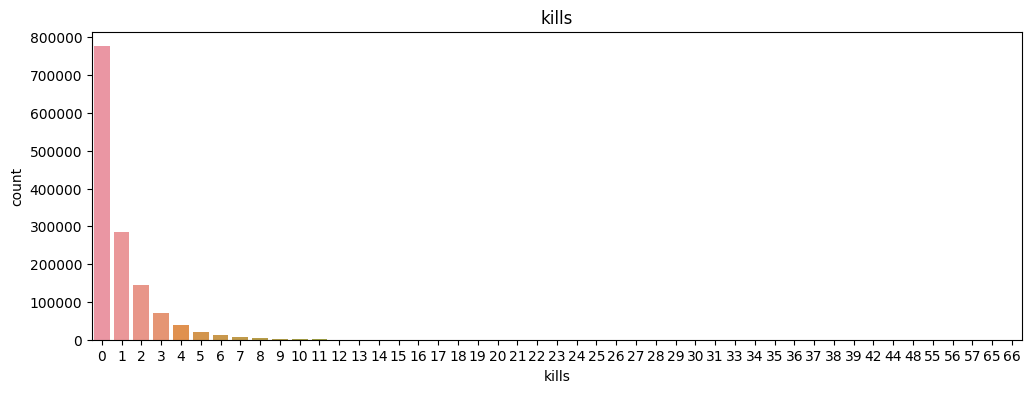

In [92]:
plt.figure(figsize = (12,4))
sns.countplot(data = pubg, x = 'kills').set_title('kills')
plt.show()

In [93]:
max(pubg['kills'])

66

In [94]:
# the maximum number of kills is 24 which is acceptable so we don't have to check this condition
# But if it comes in testing data-set it must be cheateer
# let us set the threshold to be 40
pubg['potential_cheater'] = ((pubg['kills'] > 40))

cheater_data = pd.concat([cheater_data, pubg[pubg['potential_cheater']]])
#pubg.drop(pubg[pubg['potential_cheater']==True].index, inplace = True)

## Killing from longest distance

<ipython-input-95-b6762d222c8b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pubg['longestKill'], kde = True, color = 'r')


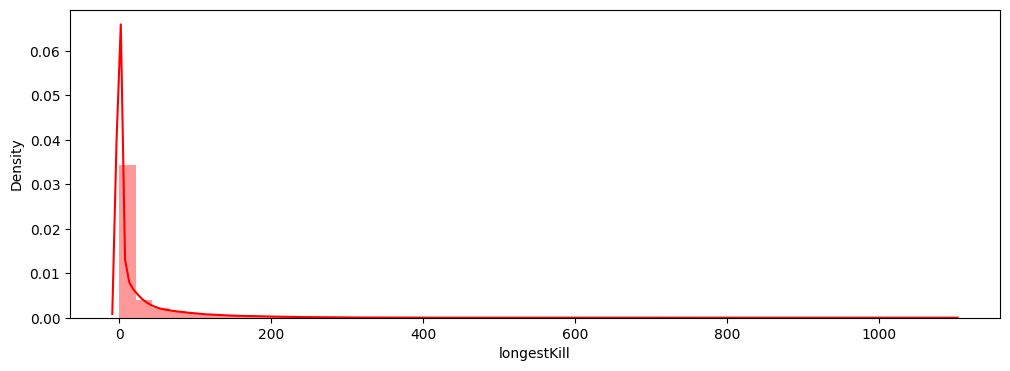

In [95]:
plt.figure(figsize = (12,4))
sns.distplot(pubg['longestKill'], kde = True, color = 'r')
plt.show()

In [96]:
max(pubg['longestKill'])

1094.0

Maximum Distance is given to be 625, let us assume that a ultra max player kills from distance of 1000m. Above them, it will be all cheaters.

In [97]:
pubg['potential_cheater'] = (pubg['longestKill'] >= 1000)
cheater_data = pd.concat([cheater_data, pubg[pubg['potential_cheater'] == True]])
#pubg.drop(pubg[pubg['potential_cheater']==True].index, inplace = True)


### Distribution of weapons

<ipython-input-98-30a857dab7d9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pubg['weaponsAcquired'])


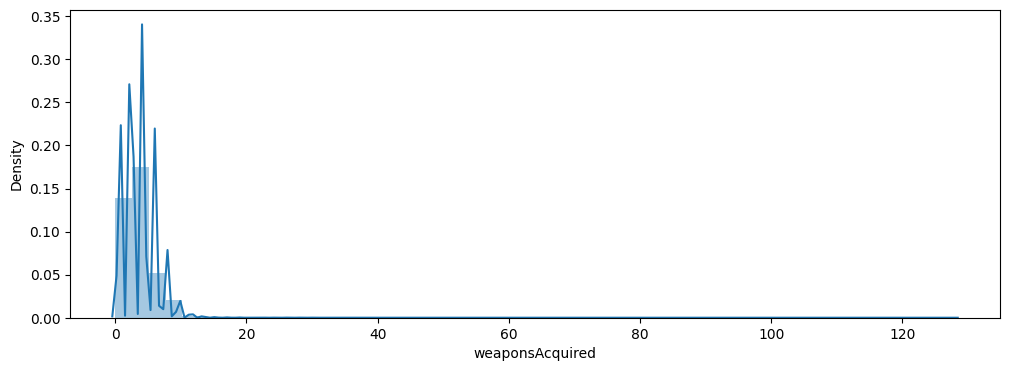

In [98]:
plt.figure(figsize = (12,4))
sns.distplot(pubg['weaponsAcquired'])
plt.show()

In [99]:
max(pubg['weaponsAcquired'])

128.0

Now, the persons who acquires more than 40 weapons are surely cheaters or hackers

In [100]:
pubg['potential_cheater'] = ((pubg['weaponsAcquired'] >= 50))
cheater_data = pd.concat([cheater_data, pubg[pubg['potential_cheater'] == True]])

#pubg.drop(pubg[pubg['potential_cheater']==True].index, inplace = True)

pubg['potential_cheater'] = ((pubg['weaponsAcquired'] == 0) & (pubg['kills'] > 10))
cheater_data = pd.concat([cheater_data, pubg[pubg['potential_cheater'] == True]])

#pubg.drop(pubg[pubg['potential_cheater']==True].index, inplace = True)

### Distribution of the healing kits

<ipython-input-101-a9b996f16b34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pubg['heals'])


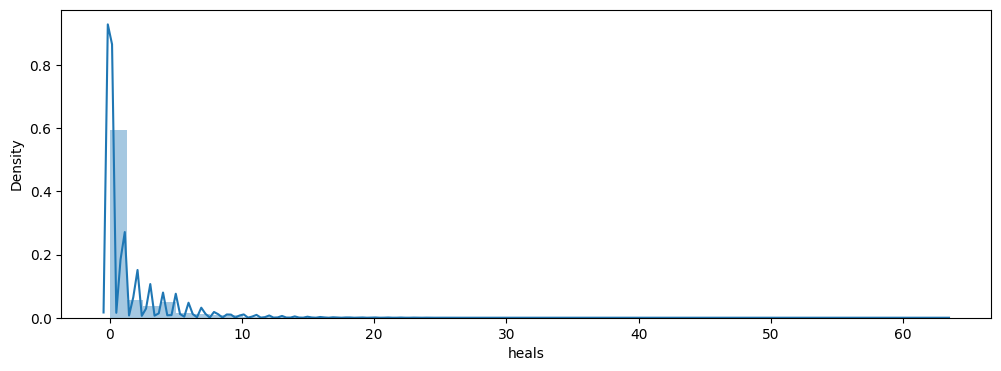

In [101]:
plt.figure(figsize=(12,4))
sns.distplot(pubg['heals'])
plt.show()

In [102]:
max(pubg['heals'])

63

Now, using more than 25 health kits in a single match is fishy, so we will treat them as cheater

In [103]:
pubg['potential_cheater'] = pubg['heals'] > 25
cheater_data = pd.concat([cheater_data, pubg[pubg['potential_cheater'] == True]])

#pubg.drop(pubg[pubg['potential_cheater']==True].index, inplace = True)

# Feature Extraction

### Correlation matrx

<ipython-input-104-7d070fc12cce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pubg.corr() , annot = True, cmap = "Blues")


<Axes: >

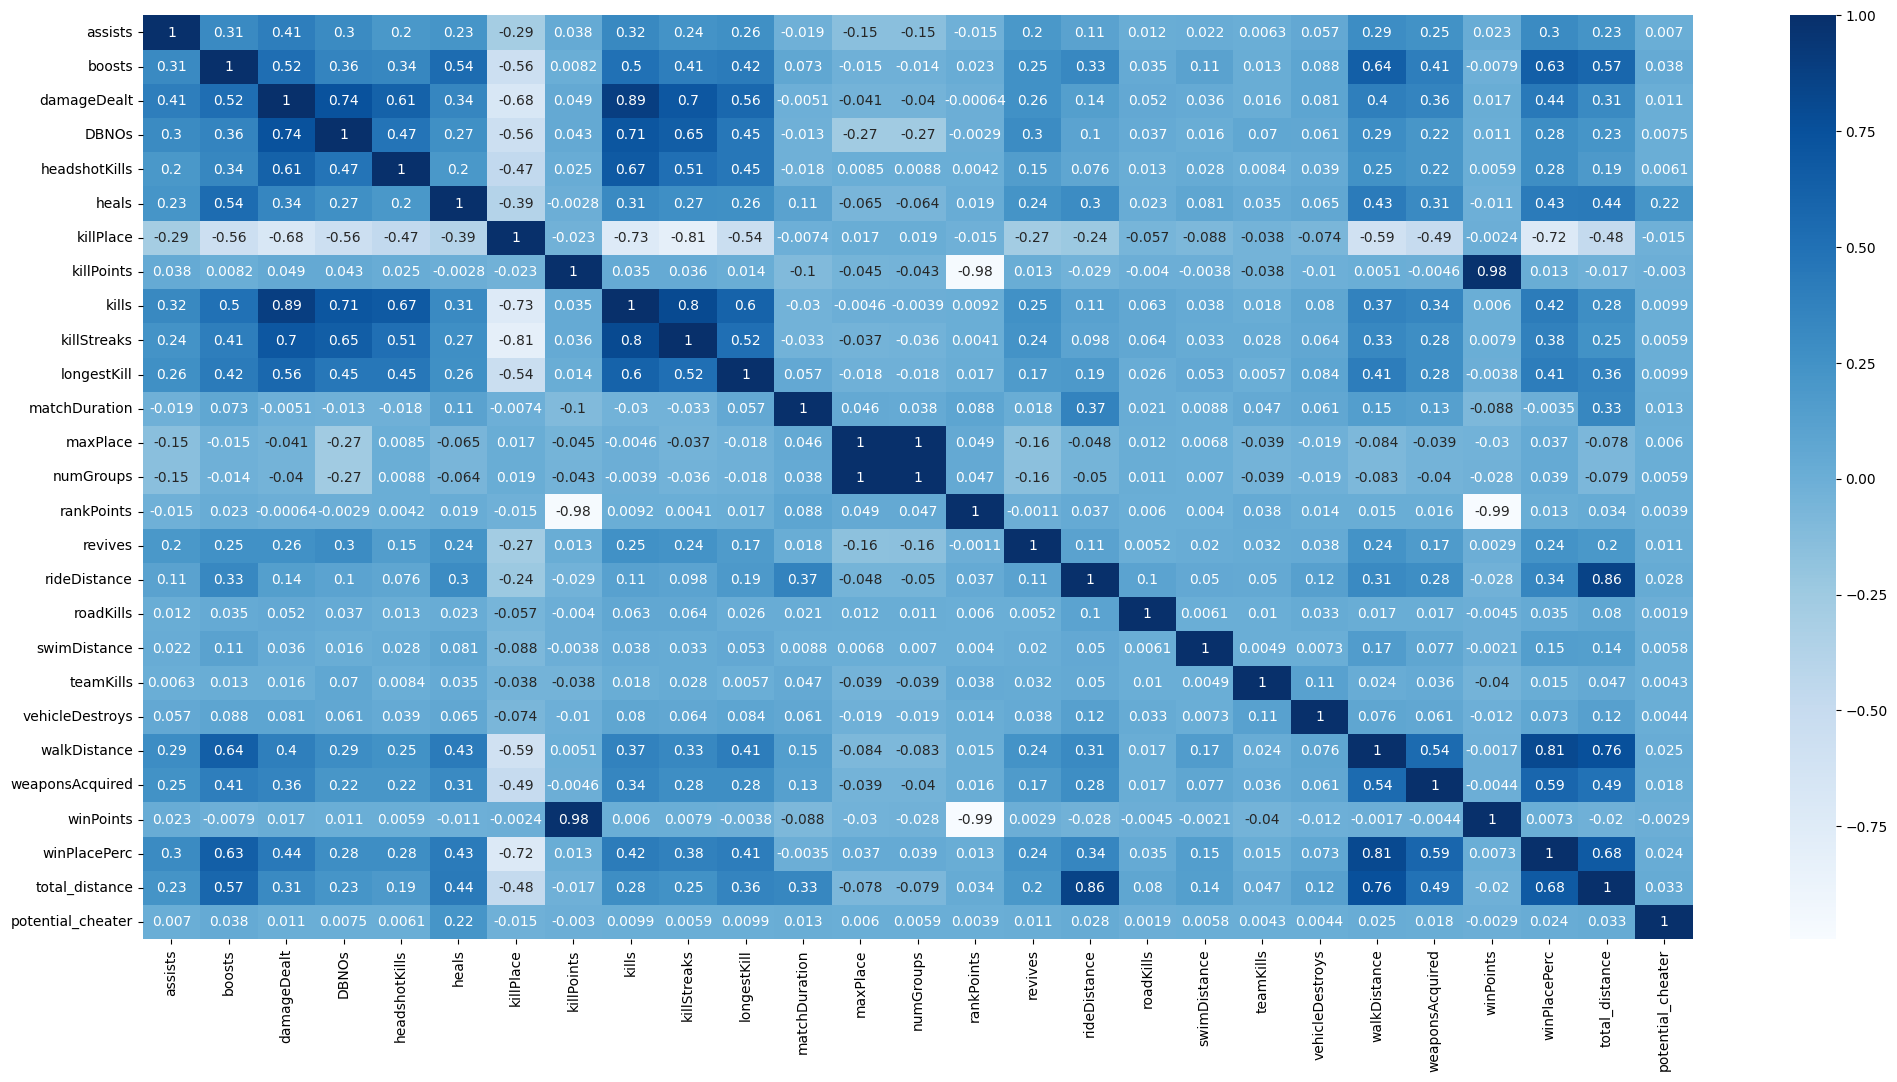

In [104]:
plt.figure(figsize = [25,12])
sns.heatmap(pubg.corr() , annot = True, cmap = "Blues")

In [105]:
# Let us drop the features which are of no use
pubg = pubg.drop(['winPlacePerc', 'winPoints', 'walkDistance', 'rideDistance', 'roadKills', 'swimDistance', 'DBNOs','Id', 'matchType', 'groupId', 'matchId' ], axis = 1)
y = pubg['potential_cheater']
X = pubg.drop(columns=['potential_cheater'])

In [106]:
print("Shape of X is ", X.shape)
print("Shape of y is ", y.shape)

Shape of X is  (1364469, 19)
Shape of y is  (1364469,)


In [107]:
X_train,X_test,  y_train, y_test = train_test_split(X, y, train_size = 0.75, stratify = y, random_state = 1)
print("Shape of X_train is ", X_train.shape)
print("Shape of y_train is ", y_train.shape)
print("Shape of X_test is ", X_test.shape)
print("Shape of y_test is ", y_test.shape)

Shape of X_train is  (1023351, 19)
Shape of y_train is  (1023351,)
Shape of X_test is  (341118, 19)
Shape of y_test is  (341118,)


## Model building

In [108]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Evaluation

In [109]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, precision_score
print("The accuracy score of the model is ",  accuracy_score(y_test, y_pred))
print("The recall score of the model is ",  recall_score(y_test, y_pred))
print("The recall score of the model is ", roc_auc_score(y_test, y_pred) )
print("The f1_score score of the model is ",  f1_score(y_test, y_pred))
print("The precision score of the model is ",  precision_score(y_test, y_pred))

The accuracy score of the model is  1.0
The recall score of the model is  1.0
The recall score of the model is  1.0
The f1_score score of the model is  1.0
The precision score of the model is  1.0


Text(0.5, 0, 'Random Forest Feature Importance')

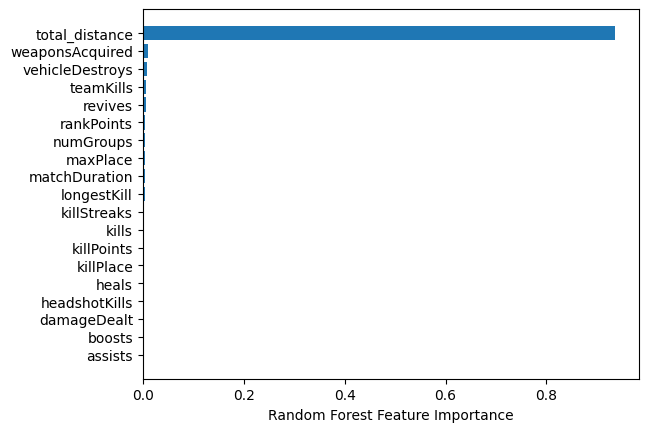

In [114]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X.columns, model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")